In [1]:
from Bio import SeqIO
import gzip

# Define the input file
input_file = "/lunarc/nobackup/projects/lu2024-17-19/J_rAAven/BRAVE/raav-60/p007/barcode_fragment/fragment_p007.fastq.gz"

# Extract sequences
sequences = []
with gzip.open(input_file, "rt") as handle:
    for record in SeqIO.parse(handle, "fastq"):
        sequences.append(str(record.seq))
        
# only keep sequences of length 69
sequences = [seq for seq in sequences if len(seq) == 25]
len(sequences)


124390234

In [2]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt

# Load sequences into a pandas DataFrame
sequence_df = pd.DataFrame([list(seq) for seq in sequences])

# Count occurrences of each nucleotide
counts_df = sequence_df.apply(pd.Series.value_counts).fillna(0)

# Convert counts to a probability matrix
probability_df = counts_df.div(counts_df.sum(axis=0), axis=1)

# transpose the matrix
probability_df = probability_df.T

probability_df.head()

,A,C,G,T
0,0.000490,0.998321,0.000099,0.001090
1,0.001435,0.000410,0.000128,0.998027
2,0.255519,0.261995,0.386158,0.096329
3,0.289019,0.218389,0.270980,0.221611
4,0.001024,0.629859,0.367799,0.001318


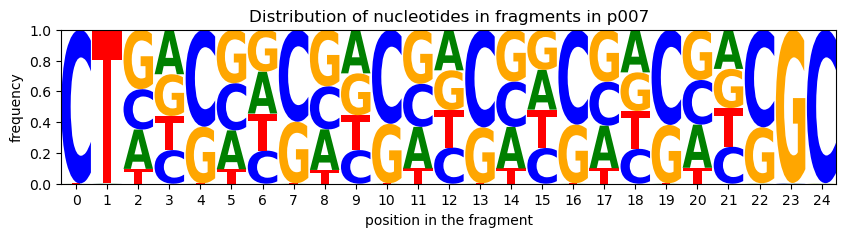

In [3]:
import matplotlib.pyplot as plt

# Create the logo
logo = logomaker.Logo(probability_df, figsize=(10, 2))

# Style the ticks (optional)
logo.style_xticks(anchor=0, spacing=1)

# Add title, x-label, and y-label
plt.title("Distribution of nucleotides in fragments in p007")
plt.xlabel("position in the fragment")
plt.ylabel("frequency")
plt.savefig("plots/frag_dist_p007.png", dpi=300)
# Display the plot
plt.show()
